In [2]:
path = r'kc_house_data.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(path)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### EDA

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<Axes: xlabel='price', ylabel='Count'>

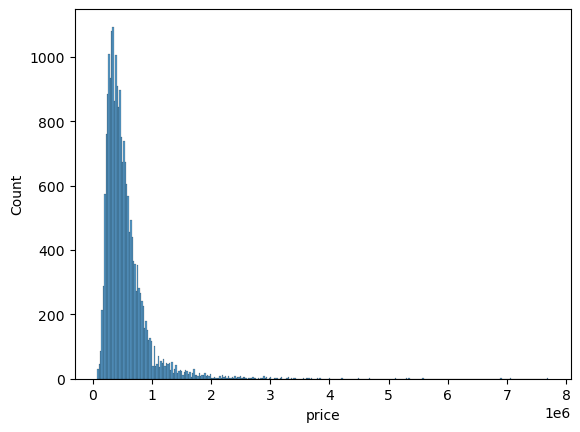

In [6]:
sns.histplot(df['price'])

In [ ]:
sns.countplot(df['bedrooms'])

<Axes: ylabel='count'>

Error in callback <function _draw_all_if_interactive at 0x0000020577509620> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

<Axes: xlabel='price', ylabel='sqft_living'>

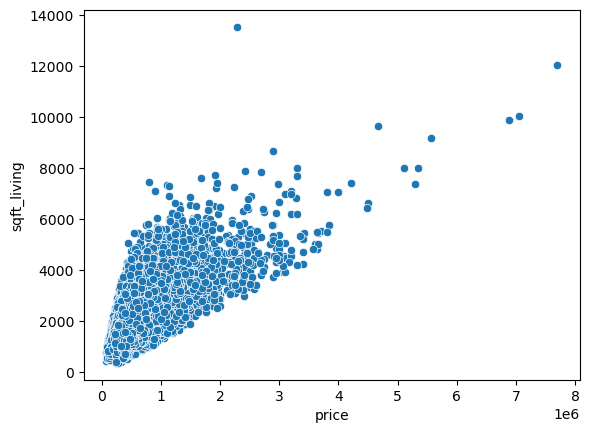

In [5]:
sns.scatterplot(x='price', y='sqft_living', data=df)

<Axes: xlabel='long', ylabel='price'>

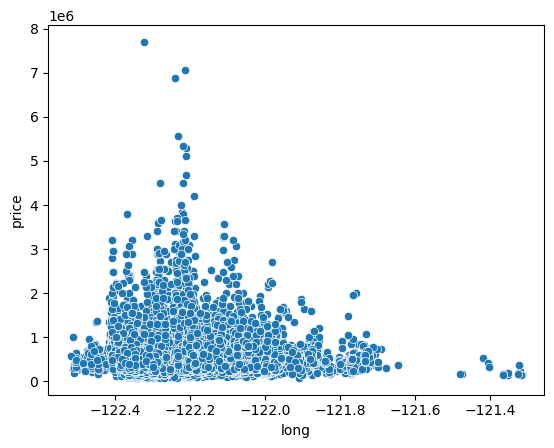

In [6]:
sns.scatterplot(x='long', y='price', data=df)

<Axes: xlabel='lat', ylabel='price'>

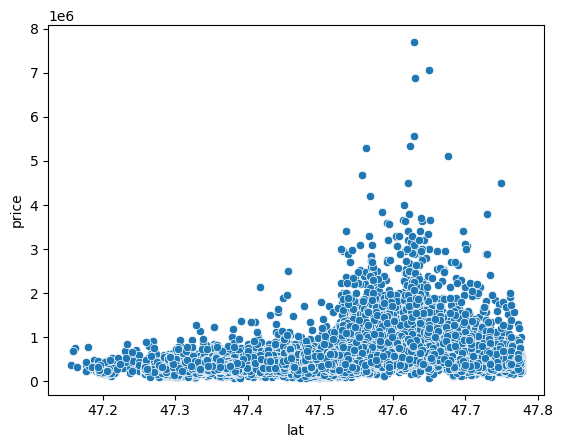

In [7]:
sns.scatterplot(x='lat', y='price', data=df)

<Axes: xlabel='lat', ylabel='long'>

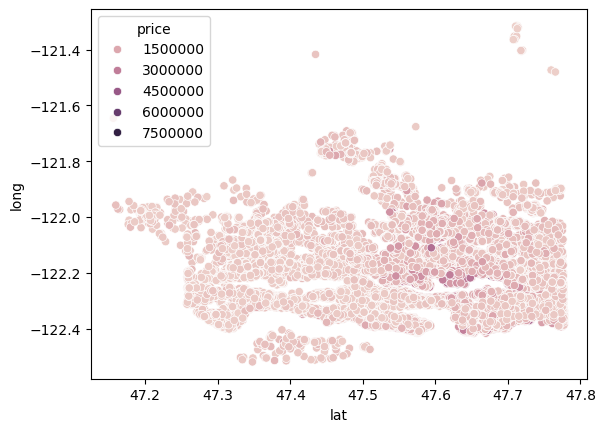

In [8]:
sns.scatterplot(x='lat', y='long', data=df, hue='price')

<Axes: xlabel='waterfront', ylabel='price'>

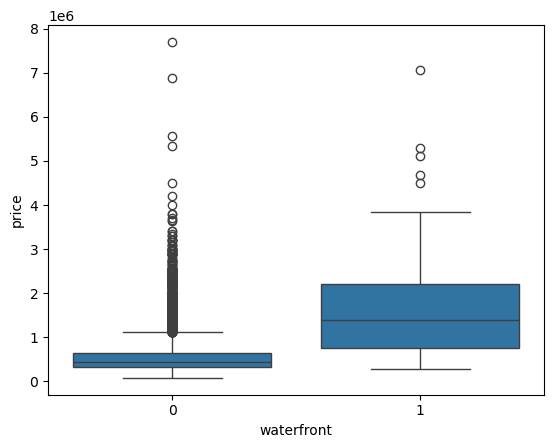

In [9]:
sns.boxplot(x='waterfront', y='price', data=df)

### Prepare the Data

In [10]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
df = df.drop('id', axis=1)

In [12]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
df['month'] = df['date'].apply(lambda d : d.month)
df['year'] = df['date'].apply(lambda d : d.year)

<Axes: xlabel='month'>

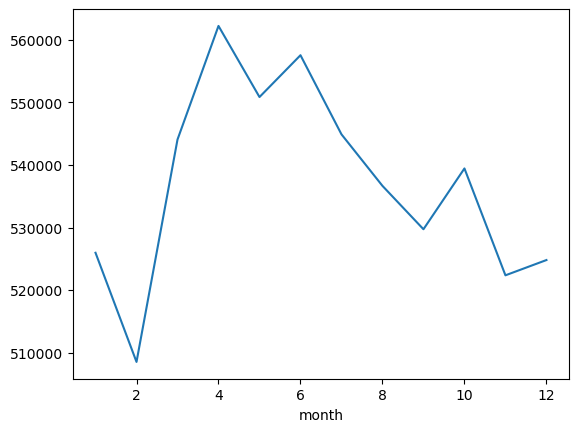

In [14]:
df.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

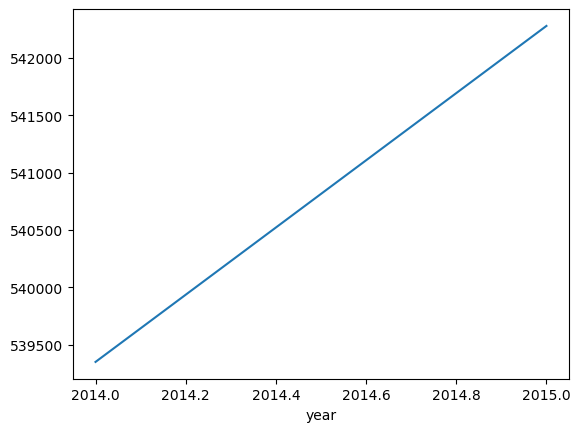

In [15]:
df.groupby('year').mean()['price'].plot()

In [16]:
df = df.drop('date',axis=1)

In [17]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


### Training

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [19]:
X = df.drop('price',axis=1)
y = df['price']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)

### Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Creation

In [34]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [35]:
model.fit(
    x=X_train,
    y=y_train.values,
    validation_data=(X_test,y_test.values),
    batch_size=128,
    epochs=100
)

Epoch 1/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 426054156288.0000 - val_loss: 414019584000.0000
Epoch 2/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 446799937536.0000 - val_loss: 393705881600.0000
Epoch 3/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 385417445376.0000 - val_loss: 251810103296.0000
Epoch 4/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 218578567168.0000 - val_loss: 98252013568.0000
Epoch 5/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 104825626624.0000 - val_loss: 91888009216.0000
Epoch 6/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99994583040.0000 - val_loss: 89702268928.0000
Epoch 7/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 96964026368.0000 - val_loss: 87076405248.0000
Epoch 8/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 93163200512.0000 - val_loss: 83994517504.0000
Epoch 9/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 83343212544.0000 - val_loss: 80789487616.0000
Epoch 10/100
152/152 ━━━━━━━━

In [36]:
losses = pd.DataFrame(model.history.history)

<Axes: >

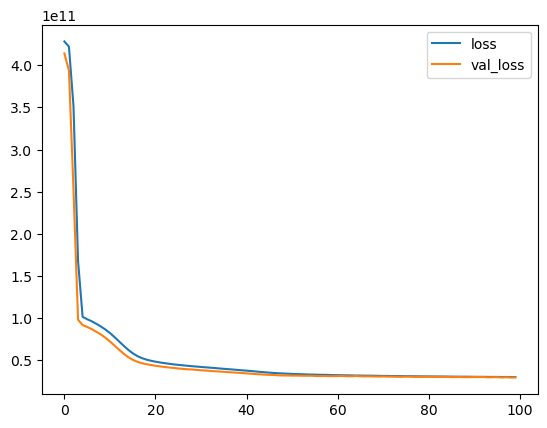

In [37]:
losses.plot()

### Evaluation

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [39]:
predictions = model.predict(X_test)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [40]:
mean_absolute_error(y_test,predictions)

106874.78004918981

In [41]:
np.sqrt(mean_squared_error(y_test,predictions))


172579.85795620887

In [30]:
explained_variance_score(y_test,predictions)

0.7629544485769532

In [31]:
df['price'].mean()

540296.5735055795

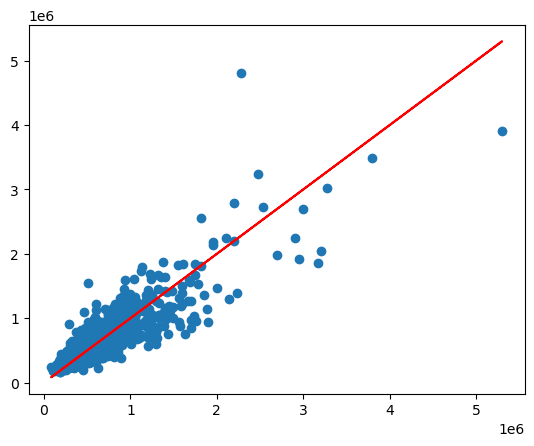

In [42]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

### Predicting for brand new house

In [43]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [44]:
single_house = df.drop('price', axis=1).iloc[0]
single_house.shape

(20,)

In [45]:
single_house = scaler.transform(single_house.values.reshape(-1, 20))

c:\Users\mindf\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [46]:
single_house

array([[0.2       , 0.06666667, 0.06934932, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.09540636,
        0.        , 0.47826087, 0.        , 0.89393939, 0.57149751,
        0.21760797, 0.16193426, 0.00574235, 0.81818182, 0.        ]])

In [47]:
model.predict(single_house)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[262038.72]], dtype=float32)